# library importing

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa.display
import sklearn
import random
from unicodedata import normalize
from keras import models
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

https://m.blog.naver.com/PostView.nhn?blogId=sexyit_2019&logNo=221603292906&proxyReferer=https:%2F%2Fwww.google.com%2F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 오디오 데이터
DATA_DIR = '/content/drive/My Drive/음표들/'

# Ready for Data

In [ ]:
# Example : train폴더의 음성파일 접근
mp3, sr = librosa.load(DATA_DIR + '높도001.mp3', sr=16000)
print('sr:', sr)
print('mp3 shape:', mp3.shape)
print('length:', mp3.shape[0]/float(sr), 'secs')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


sr: 16000
mp3 shape: (15744,)
length: 0.984 secs


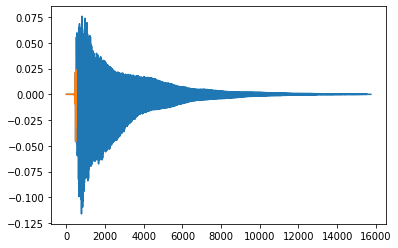

In [ ]:
# raw wave
print(plt.plot(mp3))
print(plt.plot(mp3[0:500]))

In [ ]:
# Data set list, include (raw data, mfcc data, y data)
trainset = []
testset = []

# split each set into raw data, mfcc data, and y data
# STFT 한 것, CNN 분석하기 위해 Spectogram으로 만든 것, MF한 것, mel0spectogram 한 것
train_X = []
train_mfccs = []
train_y = []

test_X = []
test_mfccs = []
test_y = []

# 모든 음성파일의 길이가 같도록 후위에 padding 처리
pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i-a.shape[0])))
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))

frame_length = 0.025
frame_stride = 0.0010

In [ ]:
import warnings

warnings.filterwarnings(action = 'ignore')

In [ ]:
# train data를 넣는다.
for filename in os.listdir(DATA_DIR):
  filename = normalize('NFC', filename)
  try:
    # wav 포맷 데이터만 사용
    if '.mp3' not in filename in filename:
      continue
      
    mp3, sr = librosa.load(DATA_DIR+ filename, sr=16000)
    
    mfcc = librosa.feature.mfcc(mp3, sr=16000, n_mfcc=20, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 120)

    # 추임새 별로 dataset에 추가
    if (filename[0] == '낮') and (filename[1] == '도') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 0))
    elif (filename[0] == '낮') and (filename[1] == '레') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 1))
    elif (filename[0] == '낮') and (filename[1] == '파') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 2))
    elif (filename[0] == '낮') and (filename[1] == '솔') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 3))
    elif (filename[0] == '낮') and (filename[1] == '라') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 4))
    elif (filename[0] == '높') and (filename[1] == '도') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 5))
    elif (filename[0] == '높') and (filename[1] == '레') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 6))
    elif (filename[0] == '높') and (filename[1] == '파') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 7))
    elif (filename[0] == '높') and (filename[1] == '솔') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 8))
    elif (filename[0] == '높') and (filename[1] == '라') and (filename[2] == '#'):
      trainset.append((padded_mfcc, 9))
    elif (filename[0] == '도') and (filename[1] == '#'):
      trainset.append((padded_mfcc, 10))
    elif (filename[0] == '레') and (filename[1] == '#'):
      trainset.append((padded_mfcc, 11))
    elif (filename[0] == '파') and (filename[1] == '#'):
      trainset.append((padded_mfcc, 12))
    elif (filename[0] == '솔') and (filename[1] == '#'):
      trainset.append((padded_mfcc, 13))
    elif (filename[0] == '라') and (filename[1] == '#'):
      trainset.append((padded_mfcc, 14))
    elif (filename[0] == '높') and (filename[1] == '도'):
      trainset.append((padded_mfcc, 15))
    elif (filename[0] == '높') and (filename[1] == '레'):
      trainset.append((padded_mfcc, 16))
    elif (filename[0] == '높') and (filename[1] == '미'):
      trainset.append((padded_mfcc, 17))
    elif (filename[0] == '높') and (filename[1] == '파'):
      trainset.append((padded_mfcc, 18))
    elif (filename[0] == '높') and (filename[1] == '솔'):
      trainset.append((padded_mfcc, 19))
    elif (filename[0] == '높') and (filename[1] == '라'):
      trainset.append((padded_mfcc, 20))
    elif (filename[0] == '높') and (filename[1] == '시'):
      trainset.append((padded_mfcc, 21))
    elif (filename[0] == '낮') and (filename[1] == '도'):
      trainset.append((padded_mfcc, 22))
    elif (filename[0] == '낮') and (filename[1] == '레'):
      trainset.append((padded_mfcc, 23))
    elif (filename[0] == '낮') and (filename[1] == '미'):
      trainset.append((padded_mfcc, 24))
    elif (filename[0] == '낮') and (filename[1] == '파'):
      trainset.append((padded_mfcc, 25))
    elif (filename[0] == '낮') and (filename[1] == '솔'):
      trainset.append((padded_mfcc, 26))
    elif (filename[0] == '낮') and (filename[1] == '라'):
      trainset.append((padded_mfcc, 27))
    elif (filename[0] == '낮') and (filename[1] == '시'):
      trainset.append((padded_mfcc, 28))
    elif (filename[0] == '도'):
      trainset.append((padded_mfcc, 29))
    elif (filename[0] == '레'):
      trainset.append((padded_mfcc, 30))
    elif (filename[0] == '미'):
      trainset.append((padded_mfcc, 31))
    elif (filename[0] == '파'):
      trainset.append((padded_mfcc, 32))
    elif (filename[0] == '솔'):
      trainset.append((padded_mfcc, 33))
    elif (filename[0] == '라'):
      trainset.append((padded_mfcc, 34))
    elif (filename[0] == '시'):
      trainset.append((padded_mfcc, 35))
  except Exception as e:
    print(filename, e)
    raise

# 학습 데이터를 무작위로 섞는다.
random.shuffle(trainset)

print('끝!')

끝!


In [ ]:
# test data를 넣는다.
for filename in os.listdir(DATA_DIR):
  filename = normalize('NFC', filename)
  try:
    # wav 포맷 데이터만 사용
    if '.mp3' not in filename in filename:
      continue
      
    mp3, sr = librosa.load(DATA_DIR+ filename, sr=16000)

    mfcc = librosa.feature.mfcc(mp3, sr=16000, n_mfcc=20, n_fft=400, hop_length=160)
    mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
    padded_mfcc = pad2d(mfcc, 120)

    # 추임새 별로 test dataset에 추가
    
    if (filename[0] == '낮') and (filename[1] == '도') and (filename[2] == '#'):
      testset.append((padded_mfcc, 0))
    elif (filename[0] == '낮') and (filename[1] == '레') and (filename[2] == '#'):
      testset.append((padded_mfcc, 1))
    elif (filename[0] == '낮') and (filename[1] == '파') and (filename[2] == '#'):
      testset.append((padded_mfcc, 2))
    elif (filename[0] == '낮') and (filename[1] == '솔') and (filename[2] == '#'):
      testset.append((padded_mfcc, 3))
    elif (filename[0] == '낮') and (filename[1] == '라') and (filename[2] == '#'):
      testset.append((padded_mfcc, 4))
    elif (filename[0] == '높') and (filename[1] == '도') and (filename[2] == '#'):
      testset.append((padded_mfcc, 5))
    elif (filename[0] == '높') and (filename[1] == '레') and (filename[2] == '#'):
      testset.append((padded_mfcc, 6))
    elif (filename[0] == '높') and (filename[1] == '파') and (filename[2] == '#'):
      testset.append((padded_mfcc, 7))
    elif (filename[0] == '높') and (filename[1] == '솔') and (filename[2] == '#'):
      testset.append((padded_mfcc, 8))
    elif (filename[0] == '높') and (filename[1] == '라') and (filename[2] == '#'):
      testset.append((padded_mfcc, 9))
    elif (filename[0] == '도') and (filename[1] == '#'):
      testset.append((padded_mfcc, 10))
    elif (filename[0] == '레') and (filename[1] == '#'):
      testset.append((padded_mfcc, 11))
    elif (filename[0] == '파') and (filename[1] == '#'):
      testset.append((padded_mfcc, 12))
    elif (filename[0] == '솔') and (filename[1] == '#'):
      testset.append((padded_mfcc, 13))
    elif (filename[0] == '라') and (filename[1] == '#'):
      testset.append((padded_mfcc, 14))
    elif (filename[0] == '높') and (filename[1] == '도'):
      testset.append((padded_mfcc, 15))
    elif (filename[0] == '높') and (filename[1] == '레'):
      testset.append((padded_mfcc, 16))
    elif (filename[0] == '높') and (filename[1] == '미'):
      testset.append((padded_mfcc, 17))
    elif (filename[0] == '높') and (filename[1] == '파'):
      testset.append((padded_mfcc, 18))
    elif (filename[0] == '높') and (filename[1] == '솔'):
      testset.append((padded_mfcc, 19))
    elif (filename[0] == '높') and (filename[1] == '라'):
      testset.append((padded_mfcc, 20))
    elif (filename[0] == '높') and (filename[1] == '시'):
      testset.append((padded_mfcc, 21))
    elif (filename[0] == '낮') and (filename[1] == '도'):
      testset.append((padded_mfcc, 22))
    elif (filename[0] == '낮') and (filename[1] == '레'):
      testset.append((padded_mfcc, 23))
    elif (filename[0] == '낮') and (filename[1] == '미'):
      testset.append((padded_mfcc, 24))
    elif (filename[0] == '낮') and (filename[1] == '파'):
      testset.append((padded_mfcc, 25))
    elif (filename[0] == '낮') and (filename[1] == '솔'):
      testset.append((padded_mfcc, 26))
    elif (filename[0] == '낮') and (filename[1] == '라'):
      testset.append((padded_mfcc, 27))
    elif (filename[0] == '낮') and (filename[1] == '시'):
      testset.append((padded_mfcc, 28))
    elif (filename[0] == '도'):
      testset.append((padded_mfcc, 29))
    elif (filename[0] == '레'):
      testset.append((padded_mfcc, 30))
    elif (filename[0] == '미'):
      testset.append((padded_mfcc, 31))
    elif (filename[0] == '파'):
      testset.append((padded_mfcc, 32))
    elif (filename[0] == '솔'):
      testset.append((padded_mfcc, 33))
    elif (filename[0] == '라'):
      testset.append((padded_mfcc, 34))
    elif (filename[0] == '시'):
      testset.append((padded_mfcc, 35))
  except Exception as e:
    print(filename, e)
    raise

# 평가 데이터를 무작위로 섞는다.
random.shuffle(testset)

print('끝!')

끝!


In [ ]:
train_mfccs = [a for (a,b) in trainset]
train_y = [b for (a,b) in trainset]

test_mfccs = [a for (a,b) in testset]
test_y = [b for (a,b) in testset]

train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y)) #One-Hot Incoding

test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))

print('train_mfccs:', train_mfccs.shape)
print('train_y:', train_y.shape)

print('test_mfccs:', test_mfccs.shape)
print('test_y:', test_y.shape)


train_mfccs: (555, 20, 120)
train_y: (555, 36)
test_mfccs: (555, 20, 120)
test_y: (555, 36)


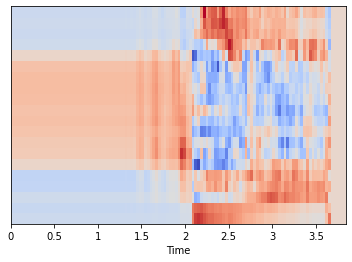

In [ ]:
librosa.display.specshow(padded_mfcc, sr=16000, x_axis='time')

# MFCC feature로 학습

In [ ]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (555, 20, 120, 1)
test X shape: (555, 20, 120, 1)


In [ ]:
ip = Input(shape=train_X_ex[0].shape)

m = Conv2D(32, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Conv2D(32*2, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Conv2D(32*3, kernel_size=(4,4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4,4))(m)

m = Flatten()(m)

m = Dense(64, activation='relu')(m)

m = Dense(32, activation='relu')(m)

op = Dense(36, activation='softmax')(m)

model = Model(ip, op)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 120, 1)]      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 117, 96)       1632      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 29, 96)         0         
_________________________________________________________________
flatten (Flatten)            (None, 11136)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                712768    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 36)                1188  

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

max_epoch = 100

history = model.fit(train_X_ex,
                    train_y,
                    epochs=max_epoch,
                    batch_size=32,
                    verbose=1,
                    validation_data=(test_X_ex, test_y))

print()
print(model)

Epoch 1/100
18/18 [==============================] - 2s 89ms/step - loss: 3.7186 - accuracy: 0.0349 - val_loss: 3.5909 - val_accuracy: 0.0468
Epoch 2/100
18/18 [==============================] - 1s 78ms/step - loss: 3.5734 - accuracy: 0.0410 - val_loss: 3.5162 - val_accuracy: 0.0613
Epoch 3/100
18/18 [==============================] - 1s 77ms/step - loss: 3.5323 - accuracy: 0.0473 - val_loss: 3.4701 - val_accuracy: 0.0703
Epoch 4/100
18/18 [==============================] - 1s 78ms/step - loss: 3.4579 - accuracy: 0.0928 - val_loss: 3.3140 - val_accuracy: 0.1261
Epoch 5/100
18/18 [==============================] - 1s 78ms/step - loss: 3.3101 - accuracy: 0.1131 - val_loss: 3.1218 - val_accuracy: 0.1459
Epoch 6/100
18/18 [==============================] - 1s 77ms/step - loss: 3.0367 - accuracy: 0.1749 - val_loss: 2.7862 - val_accuracy: 0.2450
Epoch 7/100
18/18 [==============================] - 1s 77ms/step - loss: 2.7990 - accuracy: 0.1905 - val_loss: 2.5540 - val_accuracy: 0.2757
Epoch 

In [ ]:
model.save('/content/drive/My Drive/model/classifier')

INFO:tensorflow:Assets written to: /content/drive/My Drive/model/classifier/assets
